<a href="https://colab.research.google.com/github/DestonSJU/AgenticAI/blob/main/Copy_of_Agentic_AI_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting Up the Model:

In [ ]:
# the needed libraries
!pip install diffusers transformers accelerate



In [ ]:
import diffusers
import os

# Disable the problematic progress bar widgets
diffusers.logging.disable_progress_bar()
os.environ["TQDM_DISABLE"] = "1"

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

# Load the model into memory
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")





Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


## Trial A (5 Steps and 7.5 Guidance):

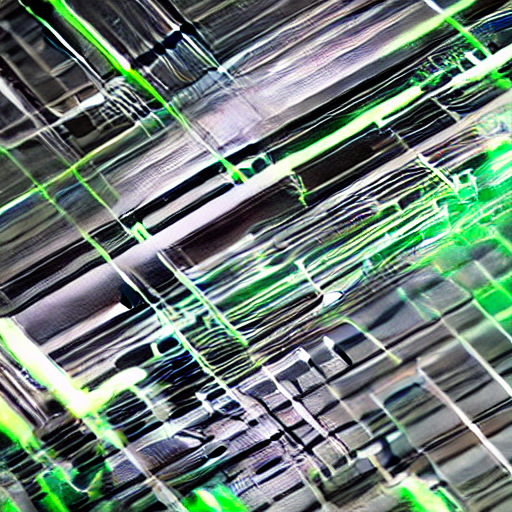

In [ ]:
# Create a generator with a fixed seed
generator = torch.Generator("cuda").manual_seed(98)

pipe.set_progress_bar_config(disable=True)

image = pipe(
    prompt = "A cyberpunk hacker terminal showing green lines of code, reflection of a neon city on the screen, 8k, raytracing.",
    generator=generator,
    num_inference_steps=5,
    guidance_scale=7.5
).images[0]

image

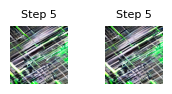

In [ ]:
import torch
import matplotlib.pyplot as plt

generator = torch.Generator("cuda").manual_seed(98)
intermediate_images = []

def latents_callback(pipe, step_index, timestep, callback_kwargs):
    # Capture every 5 iterations
    if (step_index + 1) % 5  == 0:
        latents = callback_kwargs["latents"]
        with torch.no_grad():
            # Decode and process latent to PIL
            latents = 1 / 0.18215 * latents
            image = pipe.vae.decode(latents).sample
            image = (image / 2 + 0.5).clamp(0, 1)
            image = image.cpu().permute(0, 2, 3, 1).float().numpy()
            pil_image = pipe.numpy_to_pil(image)[0]
            intermediate_images.append((step_index + 1, pil_image))

    return callback_kwargs

# Run the generation
final_image = pipe(
    prompt="A cyberpunk hacker terminal showing green lines of code, reflection of a neon city on the screen, 8k, raytracing.",
    generator=generator,
    num_inference_steps=5,
    guidance_scale=7.5,
    callback_on_step_end=latents_callback,
    callback_on_step_end_tensor_inputs=['latents']
).images[0]

# Add the final result to our list
intermediate_images.append((5, final_image))

# --- Display in a Matrix ---
cols = 3
rows = (len(intermediate_images) + cols - 1) // cols
# figsize is (width, height) in inches.
# Since we want roughly 1x1 inch images, we scale by the grid size.
plt.figure(figsize=(cols, rows))

for i, (step, img) in enumerate(intermediate_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"Step {step}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Trial B (50 Steps and 7.5 Guidance):

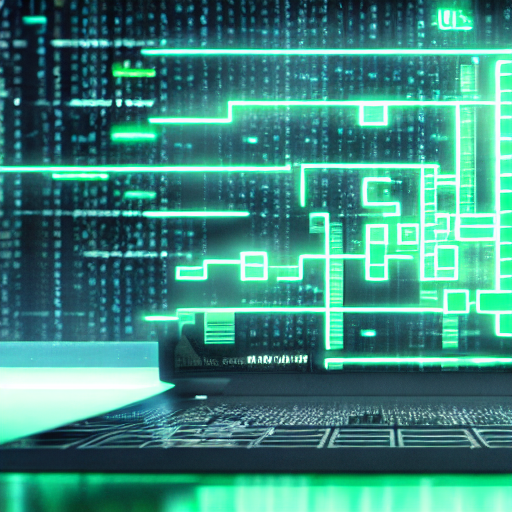

In [ ]:
# Create a generator with a fixed seed
generator = torch.Generator("cuda").manual_seed(98)

pipe.set_progress_bar_config(disable=True)

image = pipe(
    prompt = "A cyberpunk hacker terminal showing green lines of code, reflection of a neon city on the screen, 8k, raytracing.",
    generator=generator,
    num_inference_steps=50,
    guidance_scale=7.5
).images[0]

image

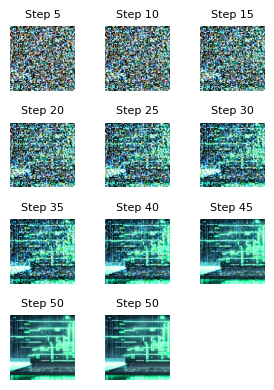

In [ ]:
import torch
import matplotlib.pyplot as plt

generator = torch.Generator("cuda").manual_seed(98)
intermediate_images = []

def latents_callback(pipe, step_index, timestep, callback_kwargs):
    # Capture every 5 iterations
    if (step_index + 1) % 5  == 0:
        latents = callback_kwargs["latents"]
        with torch.no_grad():
            # Decode and process latent to PIL
            latents = 1 / 0.18215 * latents
            image = pipe.vae.decode(latents).sample
            image = (image / 2 + 0.5).clamp(0, 1)
            image = image.cpu().permute(0, 2, 3, 1).float().numpy()
            pil_image = pipe.numpy_to_pil(image)[0]
            intermediate_images.append((step_index + 1, pil_image))

    return callback_kwargs

# Run the generation
final_image = pipe(
    prompt="A cyberpunk hacker terminal showing green lines of code, reflection of a neon city on the screen, 8k, raytracing.",
    generator=generator,
    num_inference_steps=50,
    guidance_scale=7.5,
    callback_on_step_end=latents_callback,
    callback_on_step_end_tensor_inputs=['latents']
).images[0]

# Add the final result to our list
intermediate_images.append((50, final_image))

# --- Display in a Matrix ---
cols = 3
rows = (len(intermediate_images) + cols - 1) // cols
# figsize is (width, height) in inches.
# Since we want roughly 1x1 inch images, we scale by the grid size.
plt.figure(figsize=(cols, rows))

for i, (step, img) in enumerate(intermediate_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"Step {step}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Trial C (50 Steps and 30.0 Guidance):

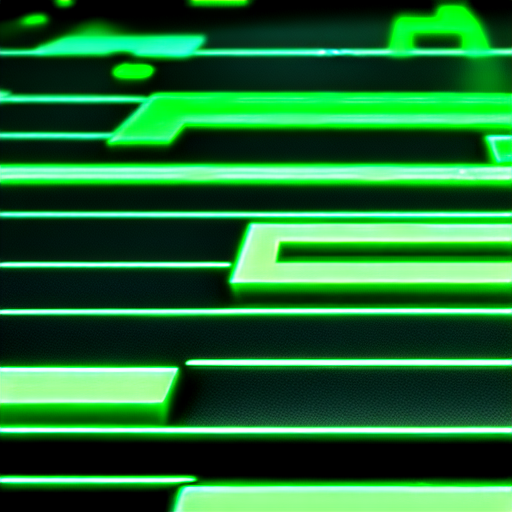

In [ ]:
# Create a generator with a fixed seed
generator = torch.Generator("cuda").manual_seed(98)

pipe.set_progress_bar_config(disable=True)

image = pipe(
    prompt = "A cyberpunk hacker terminal showing green lines of code, reflection of a neon city on the screen, 8k, raytracing.",
    generator=generator,
    num_inference_steps=50,
    guidance_scale=30.0
).images[0]

image

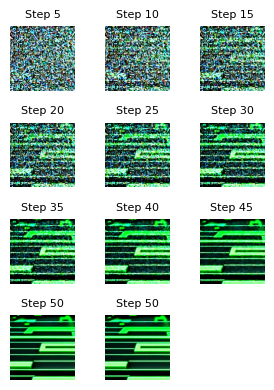

In [ ]:
import torch
import matplotlib.pyplot as plt

generator = torch.Generator("cuda").manual_seed(98)
intermediate_images = []

def latents_callback(pipe, step_index, timestep, callback_kwargs):
    # Capture every 5 iterations
    if (step_index + 1) % 5  == 0:
        latents = callback_kwargs["latents"]
        with torch.no_grad():
            # Decode and process latent to PIL
            latents = 1 / 0.18215 * latents
            image = pipe.vae.decode(latents).sample
            image = (image / 2 + 0.5).clamp(0, 1)
            image = image.cpu().permute(0, 2, 3, 1).float().numpy()
            pil_image = pipe.numpy_to_pil(image)[0]
            intermediate_images.append((step_index + 1, pil_image))

    return callback_kwargs

# Run the generation
final_image = pipe(
    prompt="A cyberpunk hacker terminal showing green lines of code, reflection of a neon city on the screen, 8k, raytracing.",
    generator=generator,
    num_inference_steps=50,
    guidance_scale=30.0,
    callback_on_step_end=latents_callback,
    callback_on_step_end_tensor_inputs=['latents']
).images[0]

# Add the final result to our list
intermediate_images.append((50, final_image))

# --- Display in a Matrix ---
cols = 3
rows = (len(intermediate_images) + cols - 1) // cols
# figsize is (width, height) in inches.
# Since we want roughly 1x1 inch images, we scale by the grid size.
plt.figure(figsize=(cols, rows))

for i, (step, img) in enumerate(intermediate_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"Step {step}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Analysis:

### Results:

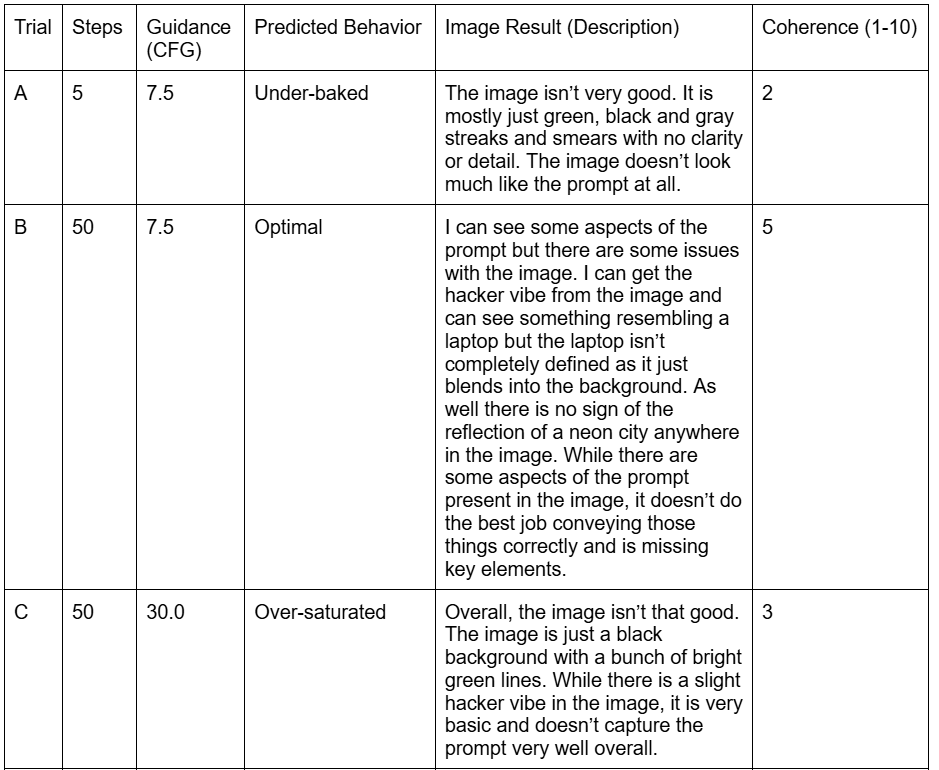

Comparing Trial A and B there is a night and day difference. Even though Trial B isn't perfect and has a lot of flaws, it still at least sort of looks like the prompt in some ways. You can tell that there is a hacker vibe and can see an attempt at a laptop even if the keys doesn't look right and it blends into the background. However, this is not the case with Trial A, as it doesn't look like anything distinct and is just a bunch of green, black, and gray smears with no detail or distinct features. The reason that Trial A looks so bad is because of the low step count of 5. When performing Image Diffusion, it takes lots of steps before a good image can be generated since the model starts with an image of noise and adds details to the image through each step. Because there were so few steps, the image that is generated is still mostly noise and as a result, it looks like just smears of color with no detail.

Looking at Trial C, it does look like the colors aren't very realistic and are too bright and vibrant. The green lines in Trial C looks too bright and brighter than the other trials. The reason that this is occuring is because the Guidance Scale is higher. When Image Diffusion uses a higher Guidance Scale, that means that the model has to follow every aspect of the prompt as much as possible, even if it hurts the overall image. When this value is too high like with Trial C, then this can result in things like colors being too bright or dark, which is the case in Trial C with the green being too bright. As well there is far less detail in this image than Trial B since all Trial C has is the green lines and a black background but none of the details that Trial B has.

Doubling the amount of steps done does not double the amount of time it takes to generate an image. This is because each step isn't linear in time. In other words, there is not one set time for each step so some steps can take longer than others. Overall, this means that adding doubling the steps may take less or more than double the time depending on how long each of the steps added take.

## Extra Credit:

Overall, the image generated here is pretty solid. It definitely captures the aspect of a neon city really well. The buildings have a lot of detail and the screens on the buildings add to the environment the image is trying to convey. While there are still hints of a hacker terminal vibe in the image with the screens, it still doesn't fully capture that aspect of the prompt that well. I would give the image a 7 out of 10 in terms of how well it generates the prompt. I think the image definitely feels like it captures the overall cyberpunk theme of the prompt but is still missing the aspect of a hacker terminal for the most part that keeps it from scoring any higher. A negative prompt can be more powerful than just changing a positive prompt because it allows for the model to avoid things that may otherwise reduce the quality of the image. In this example, getting rid of things like green and text allowed for the model to create a more detailed image that still conveys the prompt for the most part. Changing the postive prompt most likely wouldn't have resulted in the same improvement since prompts trying to produce the same vibe and enviornment as the orignial one would most likely produce similar results with similar problems holding them back. The negative prompt gets rid of those problems holding the images back from being more detailed that most likely wouldn't be able to be removed with a positive prompt without changing the essence of the prompt in some way.

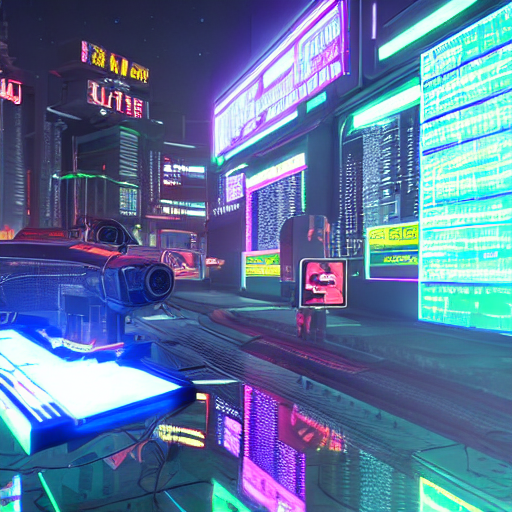

In [ ]:
# Create a generator with a fixed seed
generator = torch.Generator("cuda").manual_seed(98)

pipe.set_progress_bar_config(disable=True)

# Negative prompt added
image = pipe(
    prompt = "A cyberpunk hacker terminal showing green lines of code, reflection of a neon city on the screen, 8k, raytracing.",
    negative_prompt = "green, text, letters, numerals, matrix",
    generator=generator,
    num_inference_steps=50,
    guidance_scale=7.5
).images[0]

image

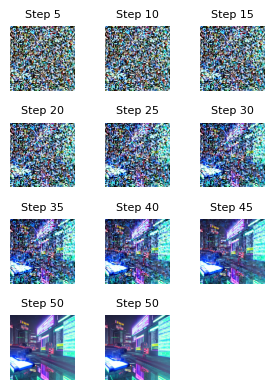

In [ ]:
import torch
import matplotlib.pyplot as plt

generator = torch.Generator("cuda").manual_seed(98)
intermediate_images = []

def latents_callback(pipe, step_index, timestep, callback_kwargs):
    # Capture every 5 iterations
    if (step_index + 1) % 5  == 0:
        latents = callback_kwargs["latents"]
        with torch.no_grad():
            # Decode and process latent to PIL
            latents = 1 / 0.18215 * latents
            image = pipe.vae.decode(latents).sample
            image = (image / 2 + 0.5).clamp(0, 1)
            image = image.cpu().permute(0, 2, 3, 1).float().numpy()
            pil_image = pipe.numpy_to_pil(image)[0]
            intermediate_images.append((step_index + 1, pil_image))

    return callback_kwargs

# Run the generation
# Negaitive prompt added
final_image = pipe(
    prompt="A cyberpunk hacker terminal showing green lines of code, reflection of a neon city on the screen, 8k, raytracing.",
    negative_prompt = "green, text, letters, numerals, matrix",
    generator=generator,
    num_inference_steps=50,
    guidance_scale=7.5,
    callback_on_step_end=latents_callback,
    callback_on_step_end_tensor_inputs=['latents']
).images[0]

# Add the final result to our list
intermediate_images.append((50, final_image))

# --- Display in a Matrix ---
cols = 3
rows = (len(intermediate_images) + cols - 1) // cols
# figsize is (width, height) in inches.
# Since we want roughly 1x1 inch images, we scale by the grid size.
plt.figure(figsize=(cols, rows))

for i, (step, img) in enumerate(intermediate_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"Step {step}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()